<a href="https://colab.research.google.com/github/shashwatb23/Week-2-/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the necessary modules

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [15]:
df = pd.read_csv('segmentation data.csv')
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


3. Do the necessary preprocessing of the data.

3.1 drop unwanted columns

In [16]:
df = df.drop('ID', axis = 1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


3.2 Check for null values.

In [17]:
DF = df.dropna()

3.3 Scale the numerical columns.

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(DF)
df_scaled = pd.DataFrame(df_scaled, columns=DF.columns)

df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


3.4 Apply some function that makes age groups turns all ages in some group to a particular number

In [19]:
df_scaled['Age'] = df_scaled['Age'].abs()

4. KMeans Model Training - Scikit-Learn (elbow method for k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

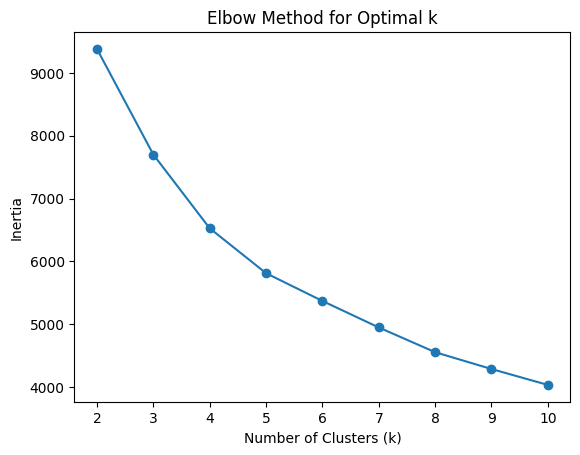

In [23]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

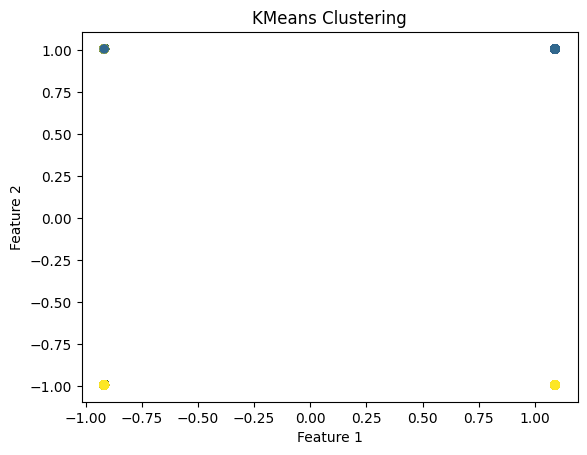

In [24]:
X = df_scaled.values
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
#

7. DBSCAN model training - Scikit-Learn

In [27]:
from sklearn.cluster import DBSCAN
sil=[]
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]
for i in range(len(eps_values)):
    for j in range(len(min_samples_values)):
        dbscan = DBSCAN(eps=eps_values[i], min_samples=min_samples_values[j])
        dbscan.fit(X)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        silhouette_avg = silhouette_score(X, labels)
        sil.append(silhouette_avg)
        print(f"eps: {eps_values[i]}, min_samples: {min_samples_values[j]}, n_clusters: {n_clusters}, silhouette_avg: {silhouette_avg}")

eps: 0.1, min_samples: 3, n_clusters: 123, silhouette_avg: -0.20264799160707878
eps: 0.1, min_samples: 4, n_clusters: 65, silhouette_avg: -0.2822116880544513
eps: 0.1, min_samples: 5, n_clusters: 46, silhouette_avg: -0.3160012334748708
eps: 0.1, min_samples: 6, n_clusters: 35, silhouette_avg: -0.35456682202336737
eps: 0.2, min_samples: 3, n_clusters: 97, silhouette_avg: 0.12364087473350135
eps: 0.2, min_samples: 4, n_clusters: 68, silhouette_avg: 0.1229490265829844
eps: 0.2, min_samples: 5, n_clusters: 57, silhouette_avg: 0.03984038085852178
eps: 0.2, min_samples: 6, n_clusters: 45, silhouette_avg: -0.014590049452382537
eps: 0.5, min_samples: 3, n_clusters: 78, silhouette_avg: 0.4365354436379149
eps: 0.5, min_samples: 4, n_clusters: 57, silhouette_avg: 0.40632164514080954
eps: 0.5, min_samples: 5, n_clusters: 47, silhouette_avg: 0.37906731576372443
eps: 0.5, min_samples: 6, n_clusters: 41, silhouette_avg: 0.364384588043839
eps: 1, min_samples: 3, n_clusters: 65, silhouette_avg: 0.46280